In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels as arima ## For Arima modeling 

In [2]:
file_path = "data\CMO-Historical-Data-Monthly.xlsx"




df = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4, engine='openpyxl')  
# print(df.head())



xls = pd.ExcelFile(file_path, engine='openpyxl')
# print(df.isnull().sum())
# To check for null or missing data

df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

df = df.drop([0, 1])
# Droped the names of $\bbl

df.replace('…', pd.NA, inplace=True)
# Alot of dotted values (missing) replaced with NA
df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
# df.fillna(0,inplace=True)

print(df.head(10))

# print(xls.sheet_names)
# To List all sheet names

       Year  Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
2   1960M01                1.63              1.63              1.63   
3   1960M02                1.63              1.63              1.63   
4   1960M03                1.63              1.63              1.63   
5   1960M04                1.63              1.63              1.63   
6   1960M05                1.63              1.63              1.63   
7   1960M06                1.63              1.63              1.63   
8   1960M07                1.63              1.63              1.63   
9   1960M08                1.63              1.63              1.63   
10  1960M09                1.63              1.63              1.63   
11  1960M10                1.63              1.63              1.63   

    Crude oil, WTI  Coal, Australian  Coal, South African **  Natural gas, US  \
2             35.3               7.8                   29.34             0.14   
3             35.3               7.8                   2

C:\Users\pc\AppData\Local\Temp\ipykernel_9196\318850635.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('…', pd.NA, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_9196\318850635.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
C:\Users\pc\AppData\Local\Temp\ipykernel_9196\318850635.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent

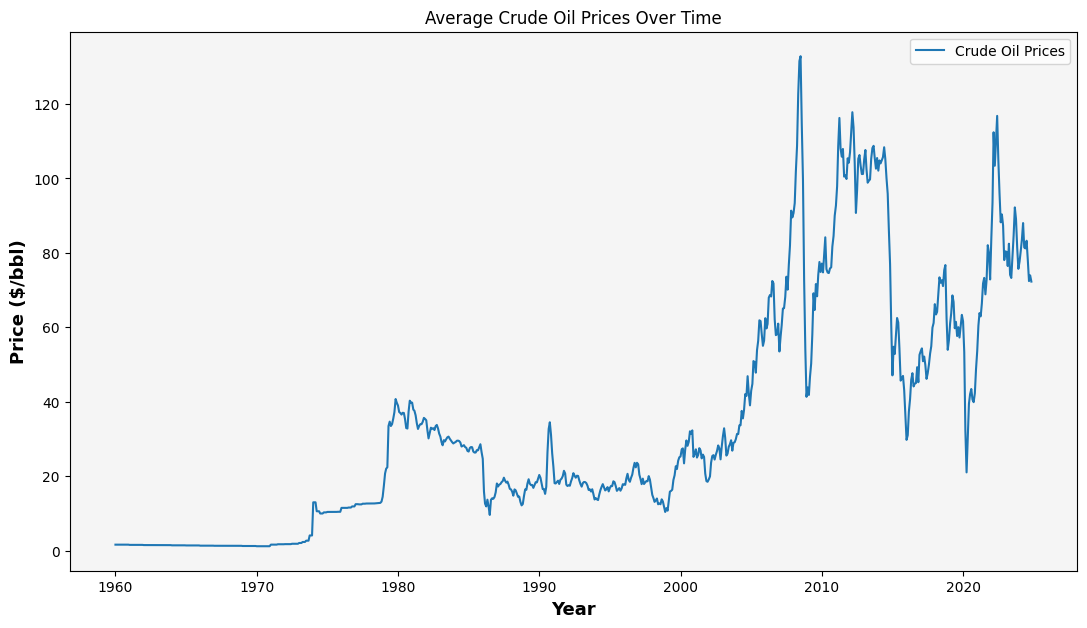

In [3]:
df['Date'] = pd.to_datetime(df['Year'], format='%YM%m') # Convert it to time instead of just shwoing numbers
df.set_index('Date', inplace=True) # Set Date column as index
plt.figure(figsize=(13,7))
plt.plot(df['Crude oil, average'], label='Crude Oil Prices')
plt.title('Average Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')

In [4]:
from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was above 0.05, therefore the series is not stationary

ADF Statistic: -1.7166884853092654
p-value: 0.4225352266727478
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is not stationary.


In [5]:
df['Crude oil, average'] = df['Crude oil, average'].diff()

from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'].dropna())

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was under 0.05, therefore the series is stationary

ADF Statistic: -12.874913291563438
p-value: 4.792077333919793e-24
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is stationary.


Text(0.5, 1.0, 'ACF Plot')

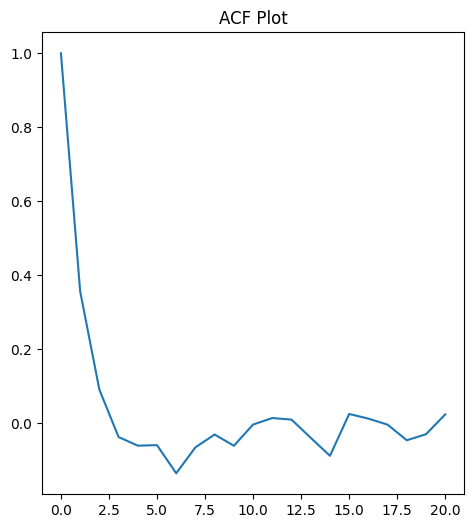

In [6]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
series = df['Crude oil, average'].dropna()

acf_values = acf(series, nlags=20)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf_values)
plt.title('ACF Plot')

Text(0.5, 1.0, 'PACF Plot')

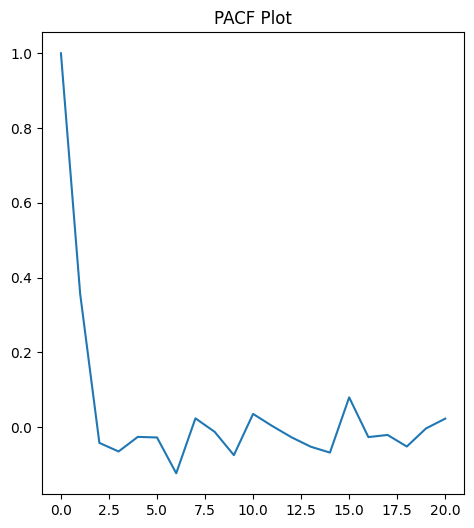

In [7]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(series, nlags=20)
plt.figure(figsize=(12, 6))
plt.subplot(122)
plt.plot(pacf_values)
plt.title('PACF Plot')

In [8]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(df['Crude oil, average'], order=(2, 0, 1))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

KeyError: 'Crude_Oil_Price'